# Feature Engineering

The performance of the baseline models suggests that the current set of features isn't quite enough to adequately predict a repeated suicide attempt. This notebook focuses on creating new features that may have better predictive ability. 

In [4]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import functions as func

In [2]:
# load data 
df = pd.read_csv('~/Desktop/repeat_suicide_attempt_cleaned_test.csv')

In [3]:
# inspect data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 67 columns):
repeat_attempt_within_oneyear    7679 non-null int64
alcohol_com_new                  7679 non-null int64
anxiety_com_new                  7679 non-null int64
anydem_com_new                   7679 non-null int64
bipolar_com_new                  7679 non-null int64
cancer_com_new                   7679 non-null int64
cerebrovascular_com_new          7679 non-null int64
chf_com_new                      7679 non-null int64
chronicpain_com_new              7679 non-null int64
circulatory_com_new              7679 non-null int64
copd_com_new                     7679 non-null int64
csrdtbi_com_new                  7679 non-null int64
csrdtbi_mild_com_new             7679 non-null int64
csrdtbi_mod_com_new              7679 non-null int64
depnos_com_new                   7679 non-null int64
depression_com_new               7679 non-null int64
dm_com_new                       7679 non-nul

In [5]:
df.head()

,repeat_attempt_within_oneyear,alcohol_com_new,anxiety_com_new,anydem_com_new,bipolar_com_new,cancer_com_new,cerebrovascular_com_new,chf_com_new,chronicpain_com_new,circulatory_com_new,...,income_3digit,education_3digit,age_group_cat2,gender,race_csrd_4cat,race_csrd_4cat_v2,race_csrd_3cat,ms_csrd_5cat,ms_csrd_2cat,ms_csrd_7cat
0,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,2.0,1.0,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,1,...,2.0,0.0,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1,1,1,1,1,3,0,6
4,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,2,1,1,1,1,2,0,3


In [6]:
df.tail()

,repeat_attempt_within_oneyear,alcohol_com_new,anxiety_com_new,anydem_com_new,bipolar_com_new,cancer_com_new,cerebrovascular_com_new,chf_com_new,chronicpain_com_new,circulatory_com_new,...,income_3digit,education_3digit,age_group_cat2,gender,race_csrd_4cat,race_csrd_4cat_v2,race_csrd_3cat,ms_csrd_5cat,ms_csrd_2cat,ms_csrd_7cat
7674,0,0,1,0,0,0,0,0,0,0,...,1.0,0.0,1,1,1,1,1,2,0,3
7675,0,0,0,0,0,0,0,0,1,0,...,3.0,1.0,1,1,1,1,1,2,0,3
7676,0,0,0,0,0,0,0,0,0,0,...,3.0,1.0,1,1,1,1,1,1,1,1
7677,0,0,0,0,0,0,0,0,0,0,...,2.0,1.0,2,1,1,1,1,1,1,1
7678,0,0,0,0,0,0,0,0,0,0,...,3.0,1.0,1,1,1,1,1,1,1,1


## Number of disorders

The majority of the current features are binary variables of individual psychiatric and medical disorders. Because our dataset consists of older veterans who all have had a prior suicide attempt, these veterans are all very sick so their feature representations generally look pretty similar. In order to improve the models, features that increase the diversity of the currrent feature set and better differentiate those who have vs. don't have a repeated suicide attempt are needed. 

One such feature could include the severity of a veteran's mental and emotional state, as more serious states can greatly contribute to subsequent suicide attempts. Considering that having multiple psychiatric and medical disorders could indicate a more serious state, we created features about the number of total, psychiatric, and medical disorders (as well as the number of each type of psychiatric disorder). 

Based on these features, I was surprised to find that veterans who had a repeated suicide attempt generally had *fewer* psychiatric or medical disorders than those who didn't have a repeated suicide attempt. For example, less than half of veterans with a subsequent suicide attempt had at least 1 disorder, whereas over 70% of those who didn't have a subsequent suicide attempt had at least 1 disorder.

In [7]:
# total number of disorders
all_disorders = func.get_feats('new', df)
print(all_disorders)

df['num_disorders'] = pd.Series(df.loc[:, all_disorders].values.sum(axis = 1))
df['num_disorders'].head()

['alcohol_com_new', 'anxiety_com_new', 'anydem_com_new', 'bipolar_com_new', 'cancer_com_new', 'cerebrovascular_com_new', 'chf_com_new', 'chronicpain_com_new', 'circulatory_com_new', 'copd_com_new', 'csrdtbi_com_new', 'csrdtbi_mild_com_new', 'csrdtbi_mod_com_new', 'depnos_com_new', 'depression_com_new', 'dm_com_new', 'drug_com_new', 'dys_com_new', 'epilepsy_com_new', 'gad_com_new', 'gastrointestinal_com_new', 'hepa_com_new', 'hepatitis_com_new', 'hepb_com_new', 'hepc_com_new', 'hiv_com_new', 'hyperten_com_new', 'liverdis_com_new', 'major_dep_com_new', 'mi_com_new', 'mooddis_com_new', 'ms_com_new', 'obesity_com_new', 'ocd_com_new', 'overwt_com_new', 'pain_com_new', 'panic_com_new', 'pd_com_new', 'perdis_com_new', 'phobic_com_new', 'pneumonia_com_new', 'psychosis_com_new', 'ptsd_com_new', 'pvd_com_new', 'renaldis_com_new', 'schiz_com_new', 'sleepissue_com_new', 'sleep_anydis_com_new', 'substance_com_new', 'tobaccodis_com_new', 'tuberculosis_com_new']


0     1
1     3
2    10
3     0
4     3
Name: num_disorders, dtype: int64

In [8]:
# total number of psychiatric disorders 
psych_disorders = [d + '_com_new' for d in ['mooddis', 'depression', 'major_dep', 'depnos', 'dys', 'bipolar', 
                                            'anxiety', 'ptsd', 'gad', 'panic', 'phobic', 'substance', 'alcohol', 
                                            'drug', 'tobaccodis', 'schiz', 'perdis', 'psychosis', 'ocd']]
print(psych_disorders)

df['num_psych_disorders'] = pd.Series(df.loc[:, psych_disorders].values.sum(axis = 1))
df['num_psych_disorders'].head()

['mooddis_com_new', 'depression_com_new', 'major_dep_com_new', 'depnos_com_new', 'dys_com_new', 'bipolar_com_new', 'anxiety_com_new', 'ptsd_com_new', 'gad_com_new', 'panic_com_new', 'phobic_com_new', 'substance_com_new', 'alcohol_com_new', 'drug_com_new', 'tobaccodis_com_new', 'schiz_com_new', 'perdis_com_new', 'psychosis_com_new', 'ocd_com_new']


0    1
1    0
2    7
3    0
4    2
Name: num_psych_disorders, dtype: int64

In [9]:
# total number of medical disorders
med_disorders = list(filter(lambda col: col not in psych_disorders, all_disorders))
print(med_disorders)

df['num_med_disorders'] = pd.Series(df.loc[:, med_disorders].values.sum(axis = 1))
df['num_med_disorders'].head()

['anydem_com_new', 'cancer_com_new', 'cerebrovascular_com_new', 'chf_com_new', 'chronicpain_com_new', 'circulatory_com_new', 'copd_com_new', 'csrdtbi_com_new', 'csrdtbi_mild_com_new', 'csrdtbi_mod_com_new', 'dm_com_new', 'epilepsy_com_new', 'gastrointestinal_com_new', 'hepa_com_new', 'hepatitis_com_new', 'hepb_com_new', 'hepc_com_new', 'hiv_com_new', 'hyperten_com_new', 'liverdis_com_new', 'mi_com_new', 'ms_com_new', 'obesity_com_new', 'overwt_com_new', 'pain_com_new', 'pd_com_new', 'pneumonia_com_new', 'pvd_com_new', 'renaldis_com_new', 'sleepissue_com_new', 'sleep_anydis_com_new', 'tuberculosis_com_new']


0    0
1    3
2    3
3    0
4    1
Name: num_med_disorders, dtype: int64

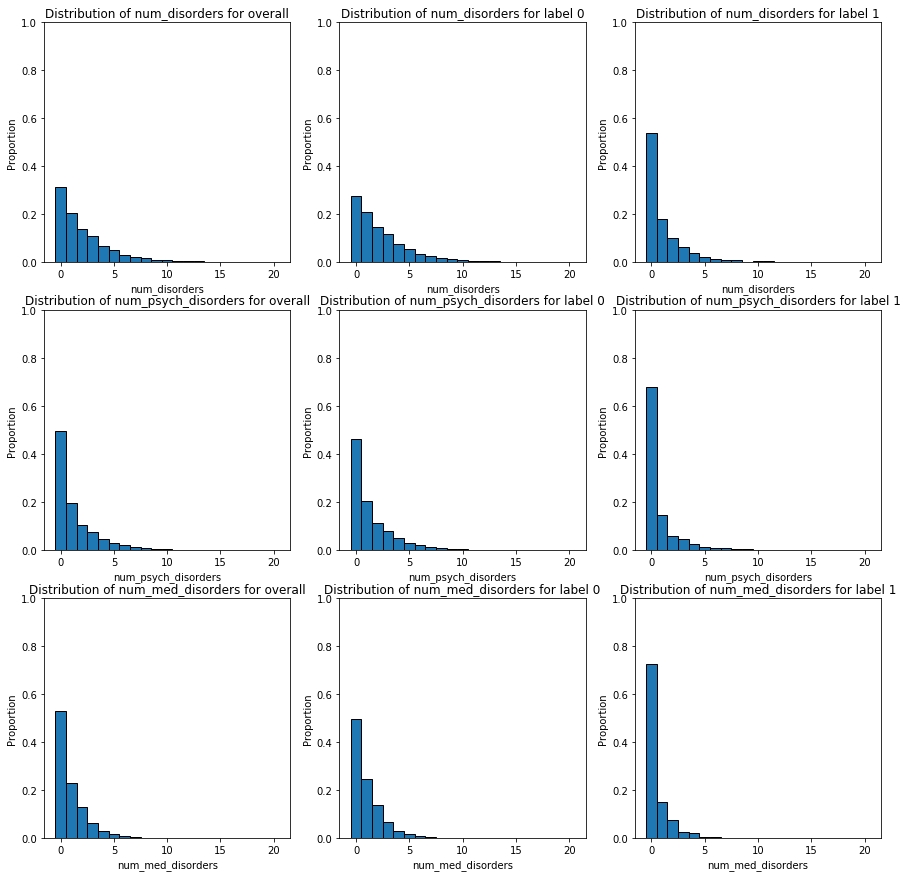

In [10]:
# plots
num_disorders = ['num_disorders', 'num_psych_disorders', 'num_med_disorders']
func.plot_feats(num_disorders, bins = np.arange(-.5,21,1), df = df)

In [11]:
# number of types of psychiatric disorders (e.g. number of mood, anxiety disorders)
mood = ['major_dep_com_new', 'depnos_com_new', 'dys_com_new', 'bipolar_com_new']
anxiety = ['ptsd_com_new', 'gad_com_new', 'panic_com_new', 'phobic_com_new', 'ocd_com_new']
substance = ['alcohol_com_new', 'drug_com_new', 'tobaccodis_com_new']
psychotic = ['schiz_com_new', 'psychosis_com_new']

psych_names = ['num_mood_disorders', 'num_anxiety_disorders', 'num_substance_disorders', 'num_psychotic_disorders']
disorders = [mood, anxiety, substance, psychotic]
num_psych_disorders = list(zip(psych_names, disorders))

for n,d in num_psych_disorders: 
    df[n] = pd.Series(df.loc[:, d].values.sum(axis = 1)) 
    
df.loc[:, psych_names].head()

,num_mood_disorders,num_anxiety_disorders,num_substance_disorders,num_psychotic_disorders
0,0,0,0,0
1,0,0,0,0
2,2,0,1,0
3,0,0,0,0
4,1,0,1,0


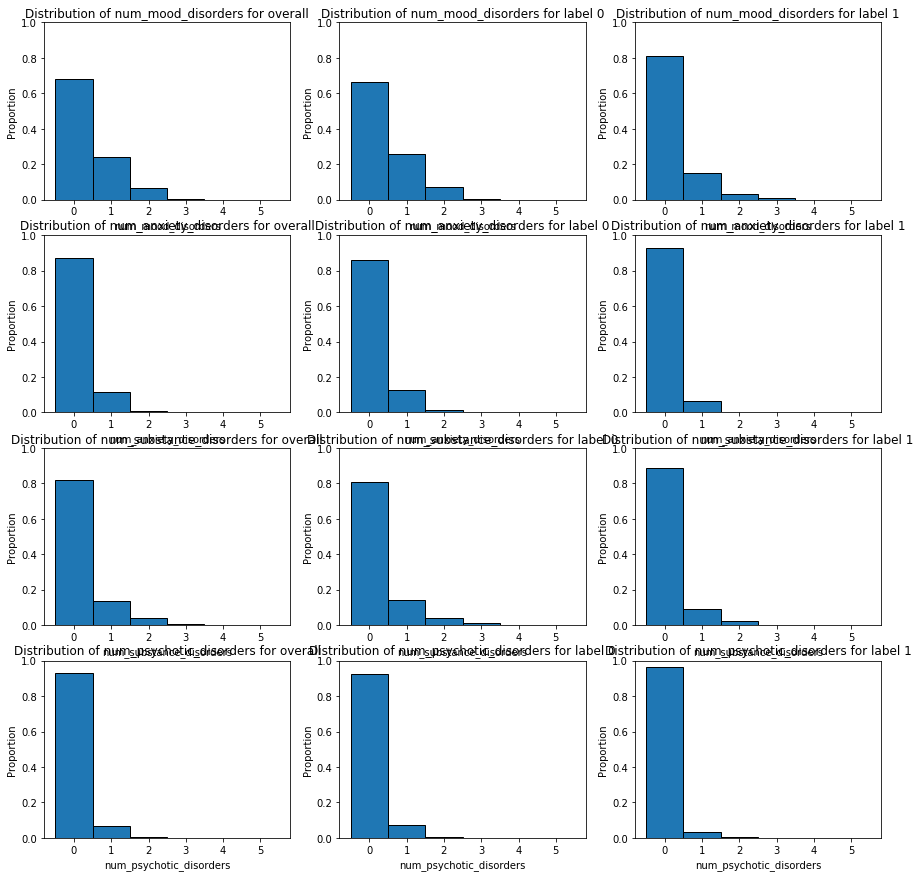

In [12]:
# plots
func.plot_feats(psych_names, bins = np.arange(-.5,6,1), df = df)

## Presence of disorders

Although individual psychiatric disorders such as posttraumatic stress disorder (PTSD) and individual medical disorders like cancer can be very debilitating and contribute to subsequent suicide attempts, psychiatric disorders may (as a whole) have a different impact on repeated suicide attempts than medical disorders. To capture the types of disorders, we created features to indicate the presence of any, psychiatric, or medical disorders.

In [13]:
# any, psychiatric, and medical disorder
bin_ranges = [0,1,df['num_disorders'].max()+1]
bin_labels = [0,1]

for d in num_disorders:
    df['yes' + d[3:]] = pd.cut(df[d], bins = bin_ranges, labels = bin_labels, right = False).astype('int64')
    
df.loc[:, func.get_feats('yes', df)].head()

,yes_disorders,yes_psych_disorders,yes_med_disorders
0,1,1,0
1,1,0,1
2,1,1,1
3,0,0,0
4,1,1,1


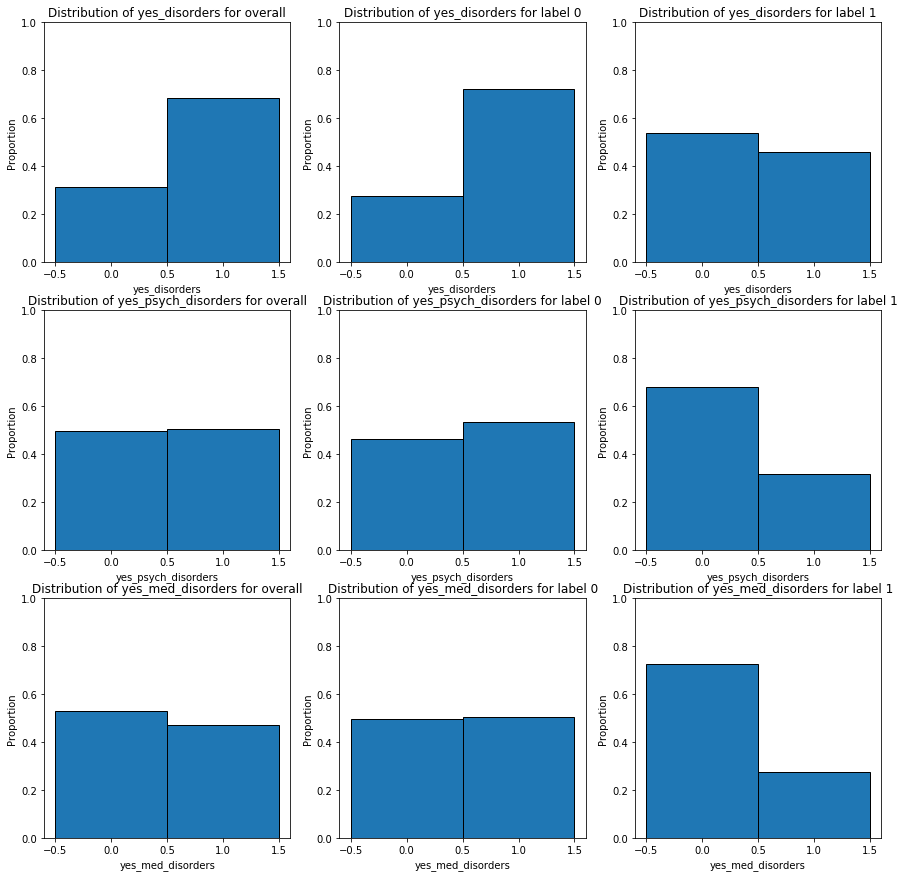

In [14]:
# plots
binned_disorders = ['yes_disorders', 'yes_psych_disorders', 'yes_med_disorders']
func.plot_feats(binned_disorders, bins = np.arange(-.5,2,1), df = df)

## Interactions with Demographics

Research suggests that sociodemographic factors like family income and marital status can help lessen the mental and emotional stress of having psychiatric and medical disorders. Because this can differ depending on the specific levels of family income and marital status, interactions between these sociodemographic features may be important.

Given that the models seem to misclassify veterans with no disorders as having repeated suicide attempts at a high rate (which lowers precision), we compared the distribution of veterans without disorders across all sociodemographic features to spot patterns that can help us with the classification. Among veterans with no disorders, the graphs show that veterans who have a repeated suicide attempt have different distriubtions of family income and marital status than those who don't have a repeated suicide attempt. Veterans with no disorders and no repeated suicide attempt show similar distrubtions of family income, but a higher proportion of married individuals. On the other hand, veterans with a repeated suicide attempt show a higher proportion of lower income and divorced/separated individuals.

Based on this, we created a feature cross between family income and marital status that may help reduce the number of false positives and improve precision.

In [15]:
# identify patients with no disorders
no_disorders_df = df[df['num_disorders'] == 0]
no_disorders_df.shape

(2410, 77)

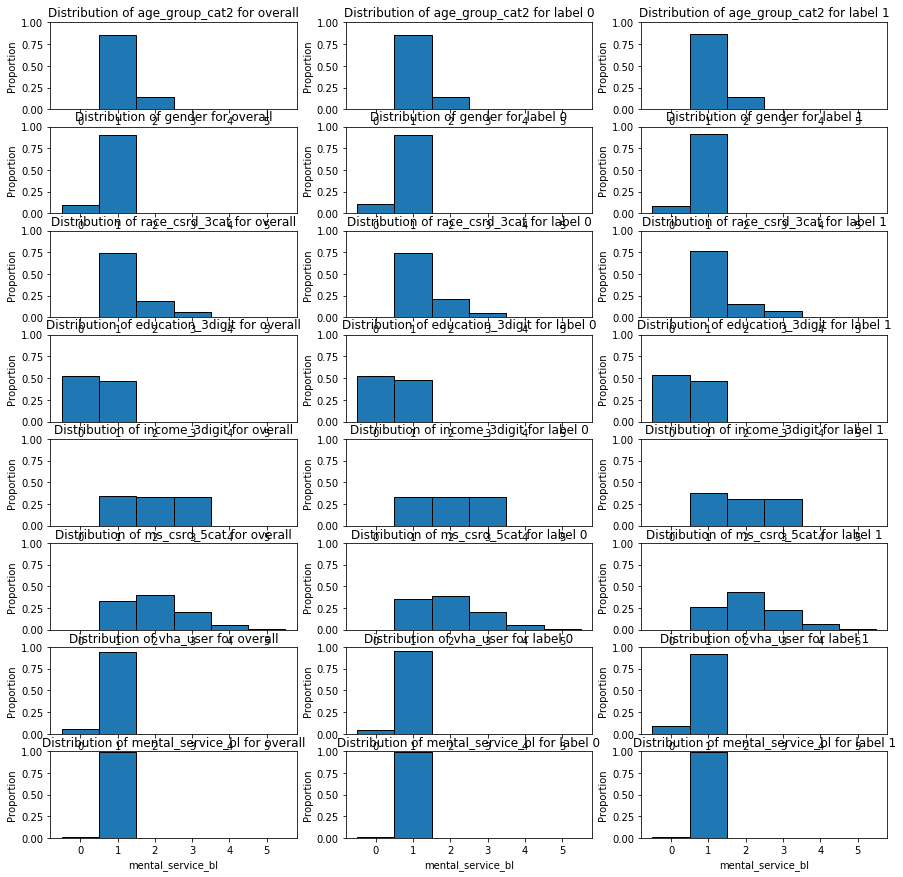

In [16]:
# plots
sociodemographic_feats = ['age_group_cat2', 'gender', 'race_csrd_3cat', 'education_3digit', 'income_3digit', 
                          'ms_csrd_5cat', 'vha_user', 'mental_service_bl']
func.plot_feats(sociodemographic_feats, bins = np.arange(-.5,6,1), df = no_disorders_df)

In [17]:
# feature cross between marital status x income
ms_df = pd.get_dummies(df['ms_csrd_5cat'], prefix = 'ms')
income_df = pd.get_dummies(df['income_3digit'], prefix = 'income')
print(ms_df.shape, income_df.shape)

ms_income = np.empty((ms_df.shape[0], ms_df.shape[1]*income_df.shape[1]))

c = 0
for i in range(income_df.values.shape[1]):
    for j in range(ms_df.values.shape[1]):
        ms_income[:,c] = np.multiply(income_df.values[:,i], ms_df.values[:,j])
        c += 1
print(ms_income.shape)

col_names = [icol + '_' + mcol for icol in income_df.columns for mcol in ms_df.columns]
print(col_names)

ms_income_dict = {col_names[c]:ms_income[:,c] for c in range(ms_income.shape[1])}
ms_income_df = pd.DataFrame(ms_income_dict)
ms_income_df.head()

(7679, 5) (7679, 3)
(7679, 15)
['income_1.0_ms_1', 'income_1.0_ms_2', 'income_1.0_ms_3', 'income_1.0_ms_4', 'income_1.0_ms_5', 'income_2.0_ms_1', 'income_2.0_ms_2', 'income_2.0_ms_3', 'income_2.0_ms_4', 'income_2.0_ms_5', 'income_3.0_ms_1', 'income_3.0_ms_2', 'income_3.0_ms_3', 'income_3.0_ms_4', 'income_3.0_ms_5']


,income_1.0_ms_1,income_1.0_ms_2,income_1.0_ms_3,income_1.0_ms_4,income_1.0_ms_5,income_2.0_ms_1,income_2.0_ms_2,income_2.0_ms_3,income_2.0_ms_4,income_2.0_ms_5,income_3.0_ms_1,income_3.0_ms_2,income_3.0_ms_3,income_3.0_ms_4,income_3.0_ms_5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# add feature cross to dataframe
df = pd.concat([df, ms_income_df], axis = 1)
df.columns

Index(['repeat_attempt_within_oneyear', 'alcohol_com_new', 'anxiety_com_new',
       'anydem_com_new', 'bipolar_com_new', 'cancer_com_new',
       'cerebrovascular_com_new', 'chf_com_new', 'chronicpain_com_new',
       'circulatory_com_new', 'copd_com_new', 'csrdtbi_com_new',
       'csrdtbi_mild_com_new', 'csrdtbi_mod_com_new', 'depnos_com_new',
       'depression_com_new', 'dm_com_new', 'drug_com_new', 'dys_com_new',
       'epilepsy_com_new', 'gad_com_new', 'gastrointestinal_com_new',
       'hepa_com_new', 'hepatitis_com_new', 'hepb_com_new', 'hepc_com_new',
       'hiv_com_new', 'hyperten_com_new', 'liverdis_com_new',
       'major_dep_com_new', 'mi_com_new', 'mooddis_com_new', 'ms_com_new',
       'obesity_com_new', 'ocd_com_new', 'overwt_com_new', 'pain_com_new',
       'panic_com_new', 'pd_com_new', 'perdis_com_new', 'phobic_com_new',
       'pneumonia_com_new', 'psychosis_com_new', 'ptsd_com_new', 'pvd_com_new',
       'renaldis_com_new', 'schiz_com_new', 'sleepissue_com_new',

In [19]:
# check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 92 columns):
repeat_attempt_within_oneyear    7679 non-null int64
alcohol_com_new                  7679 non-null int64
anxiety_com_new                  7679 non-null int64
anydem_com_new                   7679 non-null int64
bipolar_com_new                  7679 non-null int64
cancer_com_new                   7679 non-null int64
cerebrovascular_com_new          7679 non-null int64
chf_com_new                      7679 non-null int64
chronicpain_com_new              7679 non-null int64
circulatory_com_new              7679 non-null int64
copd_com_new                     7679 non-null int64
csrdtbi_com_new                  7679 non-null int64
csrdtbi_mild_com_new             7679 non-null int64
csrdtbi_mod_com_new              7679 non-null int64
depnos_com_new                   7679 non-null int64
depression_com_new               7679 non-null int64
dm_com_new                       7679 non-nul

In [21]:
# write to csv 
df.to_csv('~/Desktop/repeat_suicide_attempt_updated.csv', index = False)